In [1]:
import numpy as np  
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
import graphviz
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import statistics

Index(['Date', 'Price', 'SMA', 'EMA', 'RSI', 'Price_Return'], dtype='object')

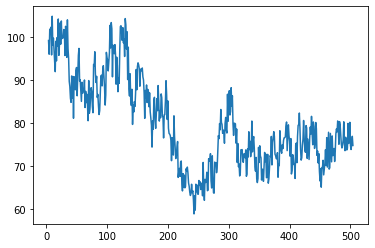

In [2]:
#We read data from csv file
df = pd.read_csv('UMD.csv')
del df['Unnamed: 0']	
df = df.drop([0, 1,2, 3]) #Becuase these cells have inappropriate values
plt.plot(df['Price'])
df.columns

In [3]:
#Defining our features, inputs and our target
features = ['Price', 'SMA', 'EMA', 'RSI']
x = df[features]
y = np.where(df.Price_Return > 0, 1, 0)
#Defining our train and test data sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=77)

501


In [5]:
#Defining our model and train that
treeClassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [6]:
#Making predictions with test data and comparing them by real targets and printing resualts
y_pred = treeClassifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        76
           1       0.76      0.68      0.72        75

    accuracy                           0.74       151
   macro avg       0.74      0.73      0.73       151
weighted avg       0.74      0.74      0.73       151



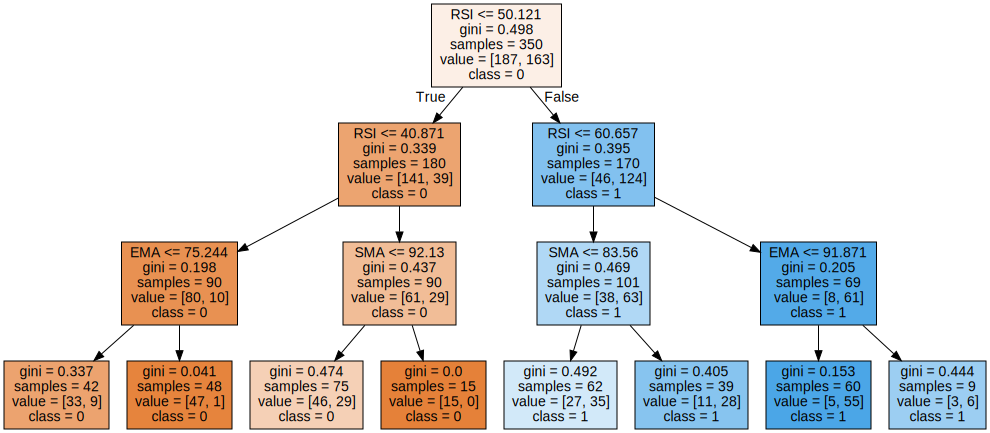

In [7]:
#Drawing graph of our results
data = tree.export_graphviz(treeClassifier, filled=True, feature_names=features, class_names=np.array(['0','1']))
graphviz.Source(data)